First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

<ipython-input-1-4eca958accba>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


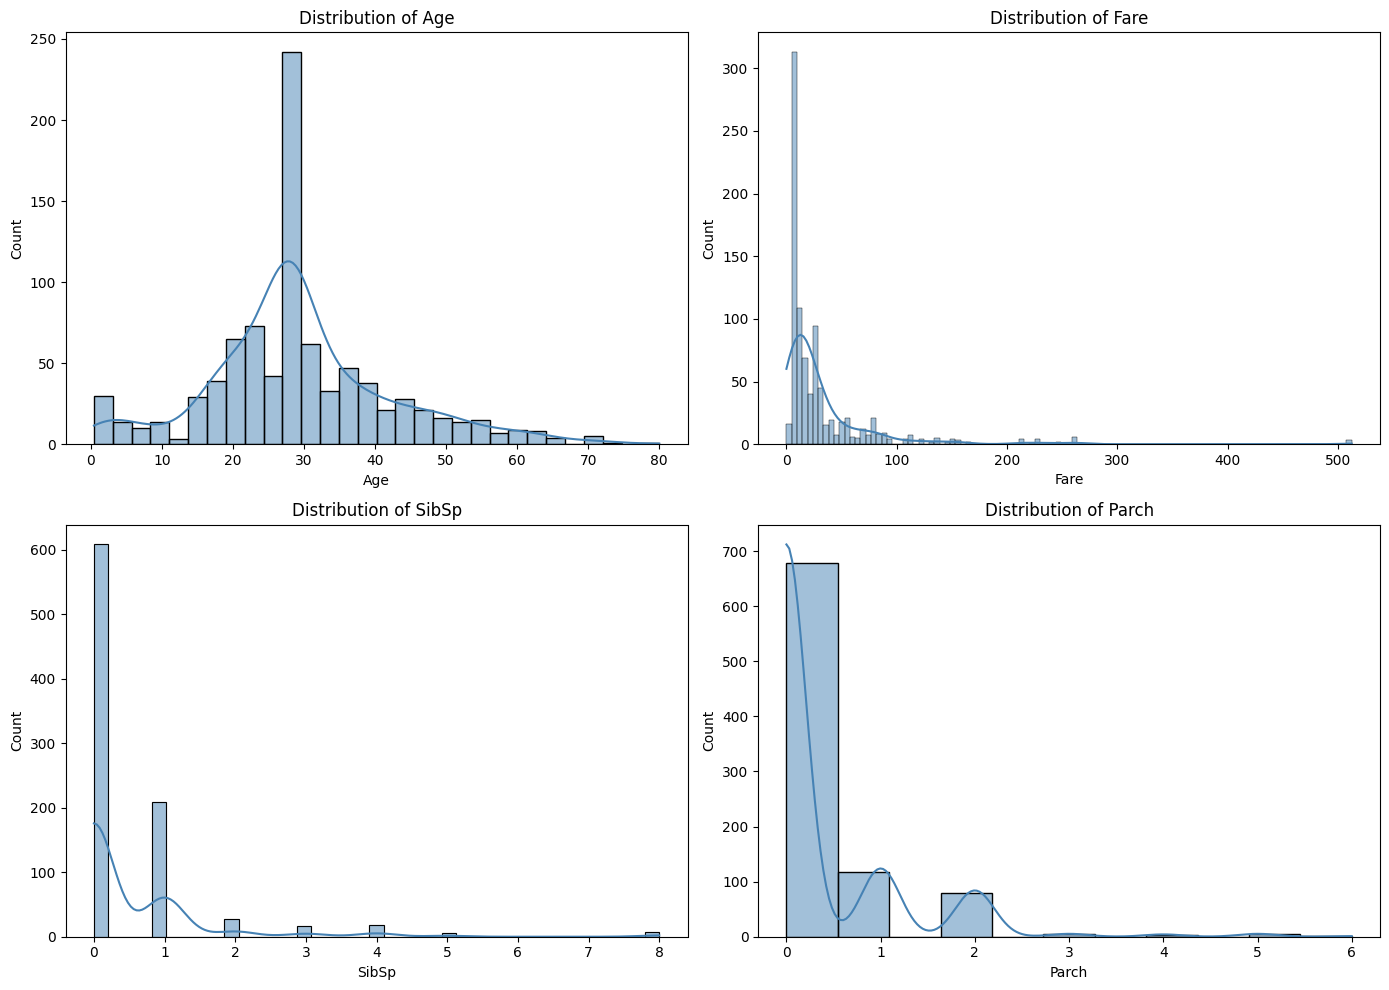

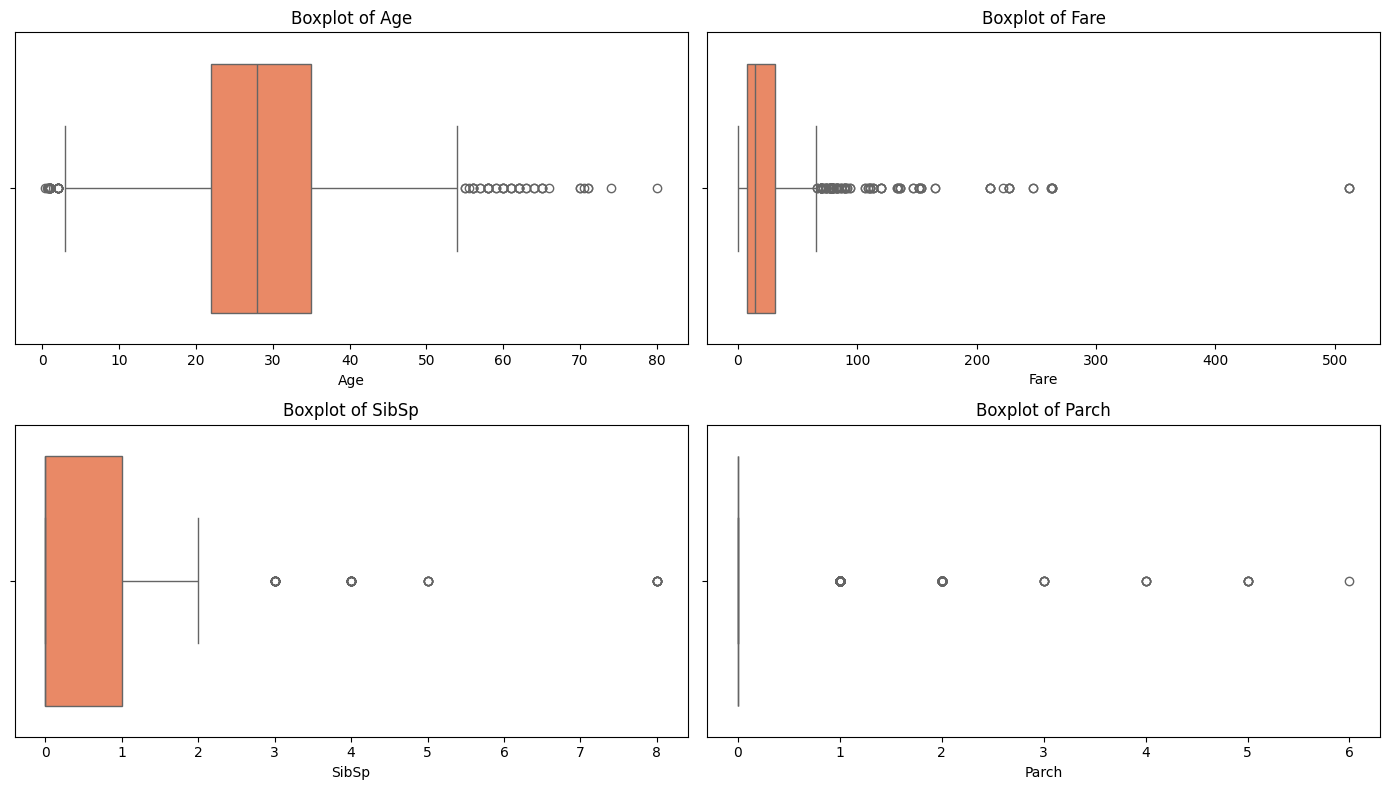

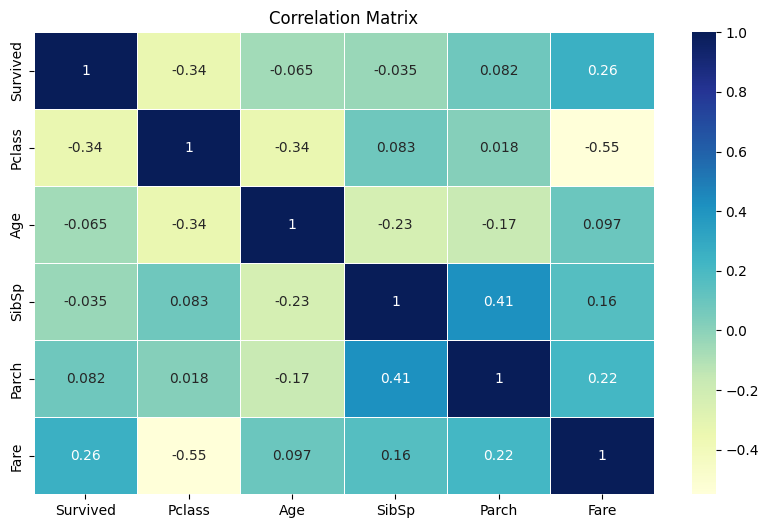

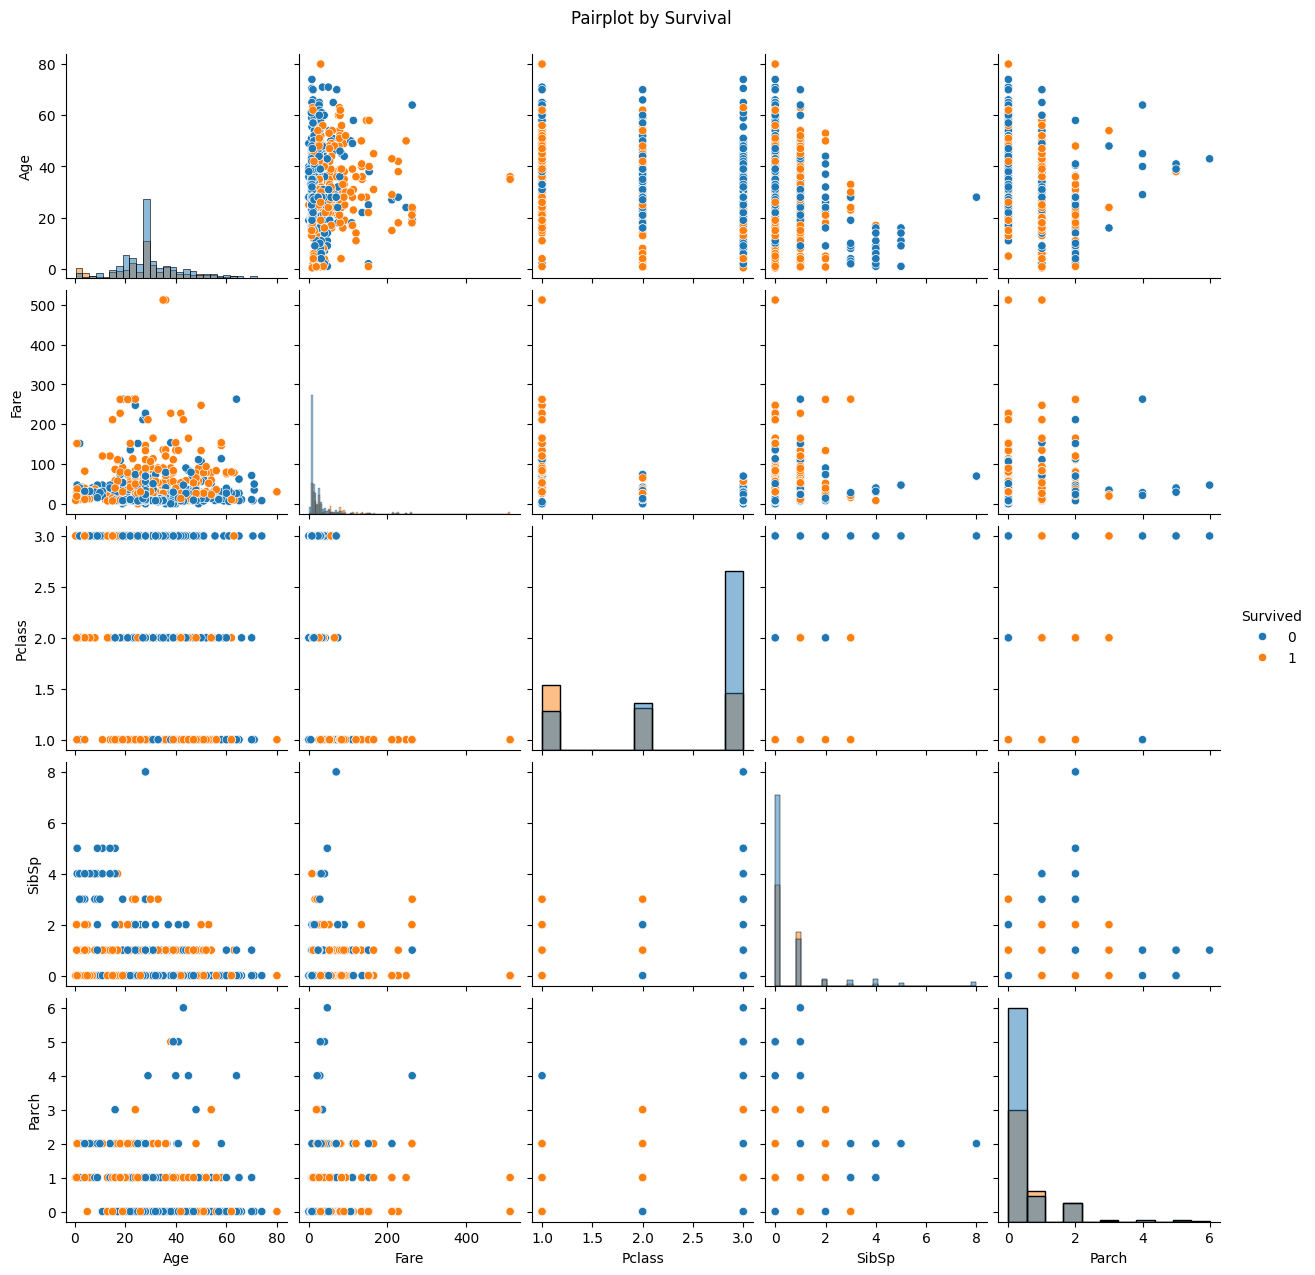

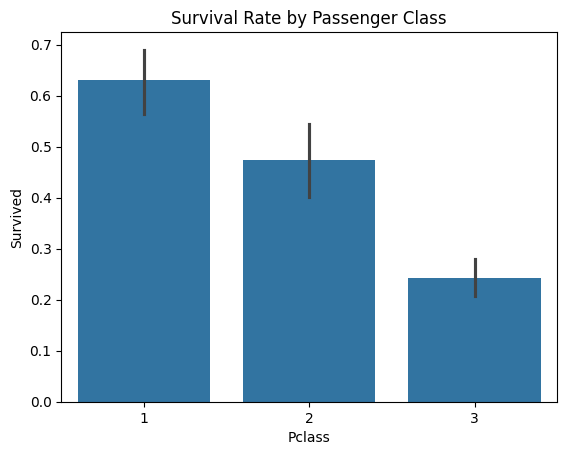

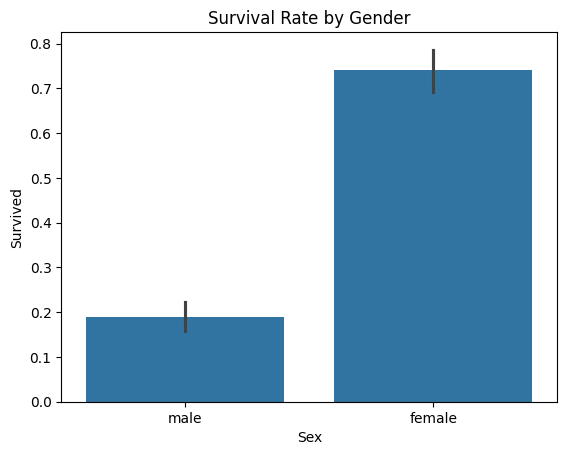

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# -----------------------------
# 1. Basic Info and Cleaning
# -----------------------------
print("First 5 rows:\n", df.head())
print("\nData Summary:")
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing age with median (optional)
df['Age'].fillna(df['Age'].median(), inplace=True)

# -----------------------------
# 2. Descriptive Statistics
# -----------------------------
print("\nSummary Statistics:\n", df.describe())

# -----------------------------
# 3. Distribution Plots
# -----------------------------
features = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(14, 10))

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# -----------------------------
# 4. Boxplots for Outliers
# -----------------------------
plt.figure(figsize=(14, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col], color='coral')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# -----------------------------
# 5. Correlation Heatmap
# -----------------------------
corr_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# -----------------------------
# 6. Pairplot with Hue = Survived
# -----------------------------
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']], hue='Survived', diag_kind='hist')
plt.suptitle('Pairplot by Survival', y=1.02)
plt.show()

# -----------------------------
# 7. Additional Insights (Optional)
# -----------------------------
# Survival rate by Pclass
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by Gender
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()
